In [6]:
from utils import load_data, filter_highpass
import matplotlib.pyplot as plt
import pywt
import scipy.signal
import numpy as np
from scipy import fft
from numpy.fft import rfft, rfftfreq
from PIL import Image
from os import listdir
from os.path import isfile, join
import time
import numpy as np
import matplotlib.pyplot as plt
import pywt
import scipy.signal
import wavio
from numpy.fft import rfft, rfftfreq

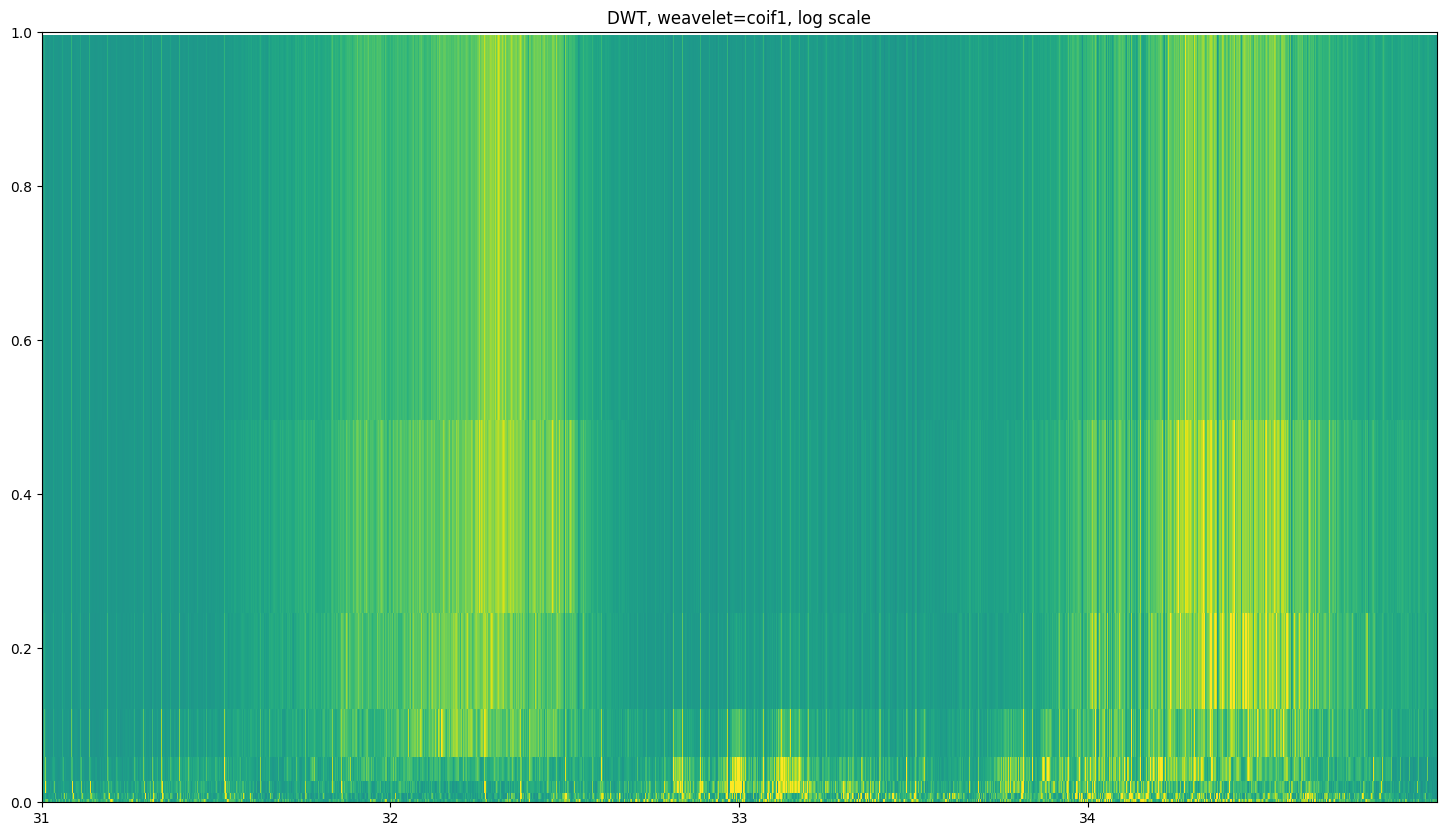

In [7]:
START = 31
END = 35
F, data = load_data("data/LmicX-14-04-33.wav")
data = data[F*(START + 60):F*(END + 60)]

def scalogram(data, wavelet_nm):
    # minn = np.min(data[-1])
    # maxx = np.max(data[-1])
    for i in range(len(data)):
        mean = np.mean(data[i])
        std_dev = np.std(data[i])
        data[i] = (data[i] - mean) / std_dev

        # data[i] = 10 * np.interp(data[i], (data[i].min(), data[i].max()), (-1, +1))
        # min_val = np.min(data[i])
        # max_val = np.max(data[i])
        # data[i] = (data[i] - min_val) / (max_val - min_val)
        # print(np.min(data[i]), np.max(data[i]), data[i])
    bottom = 0
    # vmin = min(map(lambda x: min(abs(x)), data))
    # vmax = max(map(lambda x: max(abs(x)), data))
    fig, ax = plt.subplots(figsize=(18, 10))
    for row in range(0, len(data)):
        scale = 2.0 ** (row - len(data))
        #cale = 1.0 / len(data)
        # print(scale)
        ax.imshow(
            np.array([abs(data[row])]), # cmap='gray', 
            vmin=-2, vmax=2,
            # interpolation='nearest',
            aspect='auto',
            extent = [START, END, bottom, bottom + scale]
        )
        ax.set_xticks(np.arange(START, END, step=1))
        #plt.yticks(np.arange(0, 1, step=0.2))
        ax.set_ylim([0, 1])
        #plt.xlim([START, END])
        bottom += scale
    plt.title(wavelet_nm)
    plt.show()
#signal = data[:lepow2(len(data))]
sig = pywt.wavedec(data, 'coif1', level=7)
scalogram(sig, 'DWT, weavelet=coif1, log scale')

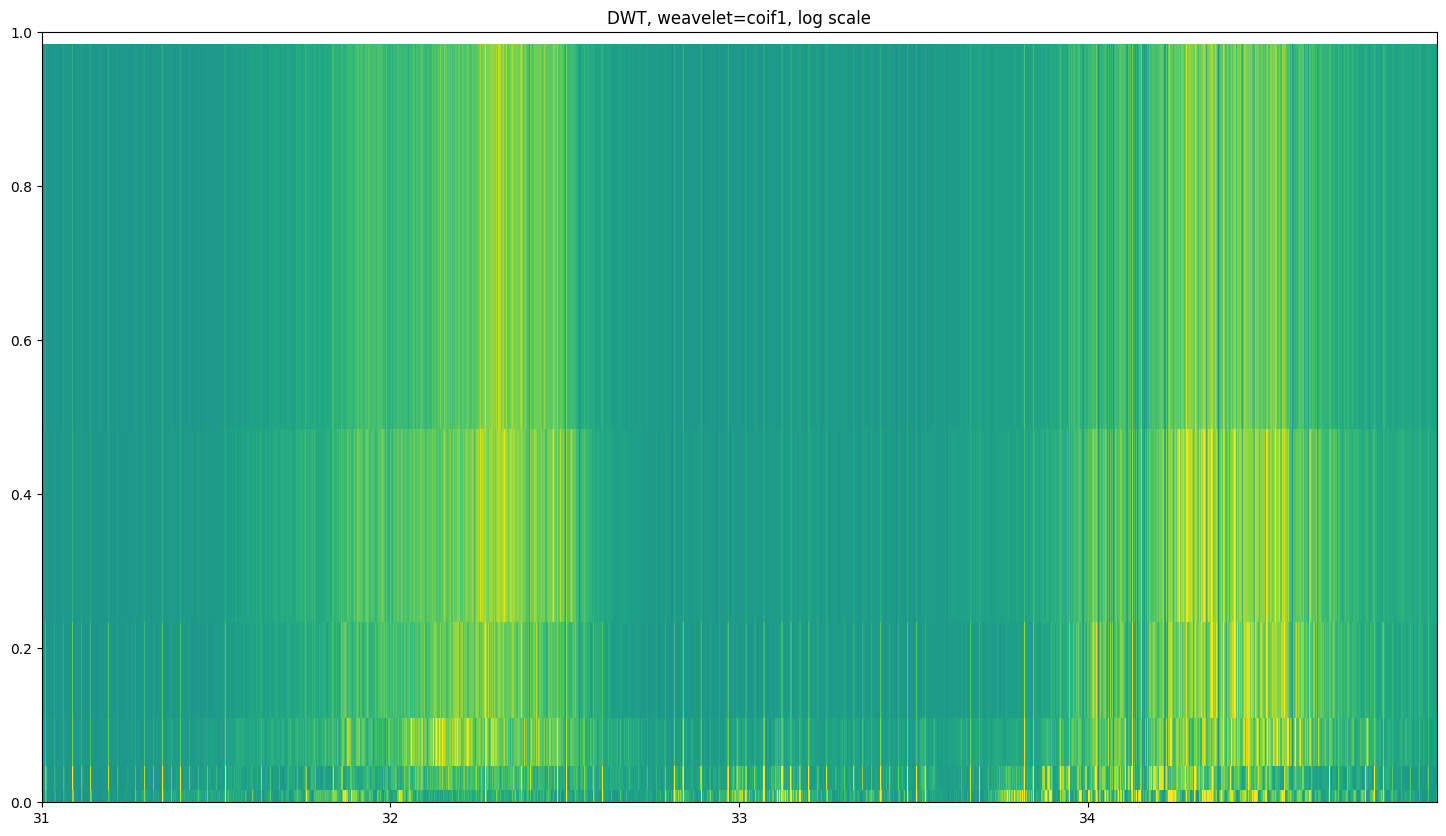

In [111]:
filtered = filter_highpass(F, data, 0.015)
sig = pywt.wavedec(filtered, 'coif1', level=5)
scalogram(sig, 'DWT, weavelet=coif1, log scale')

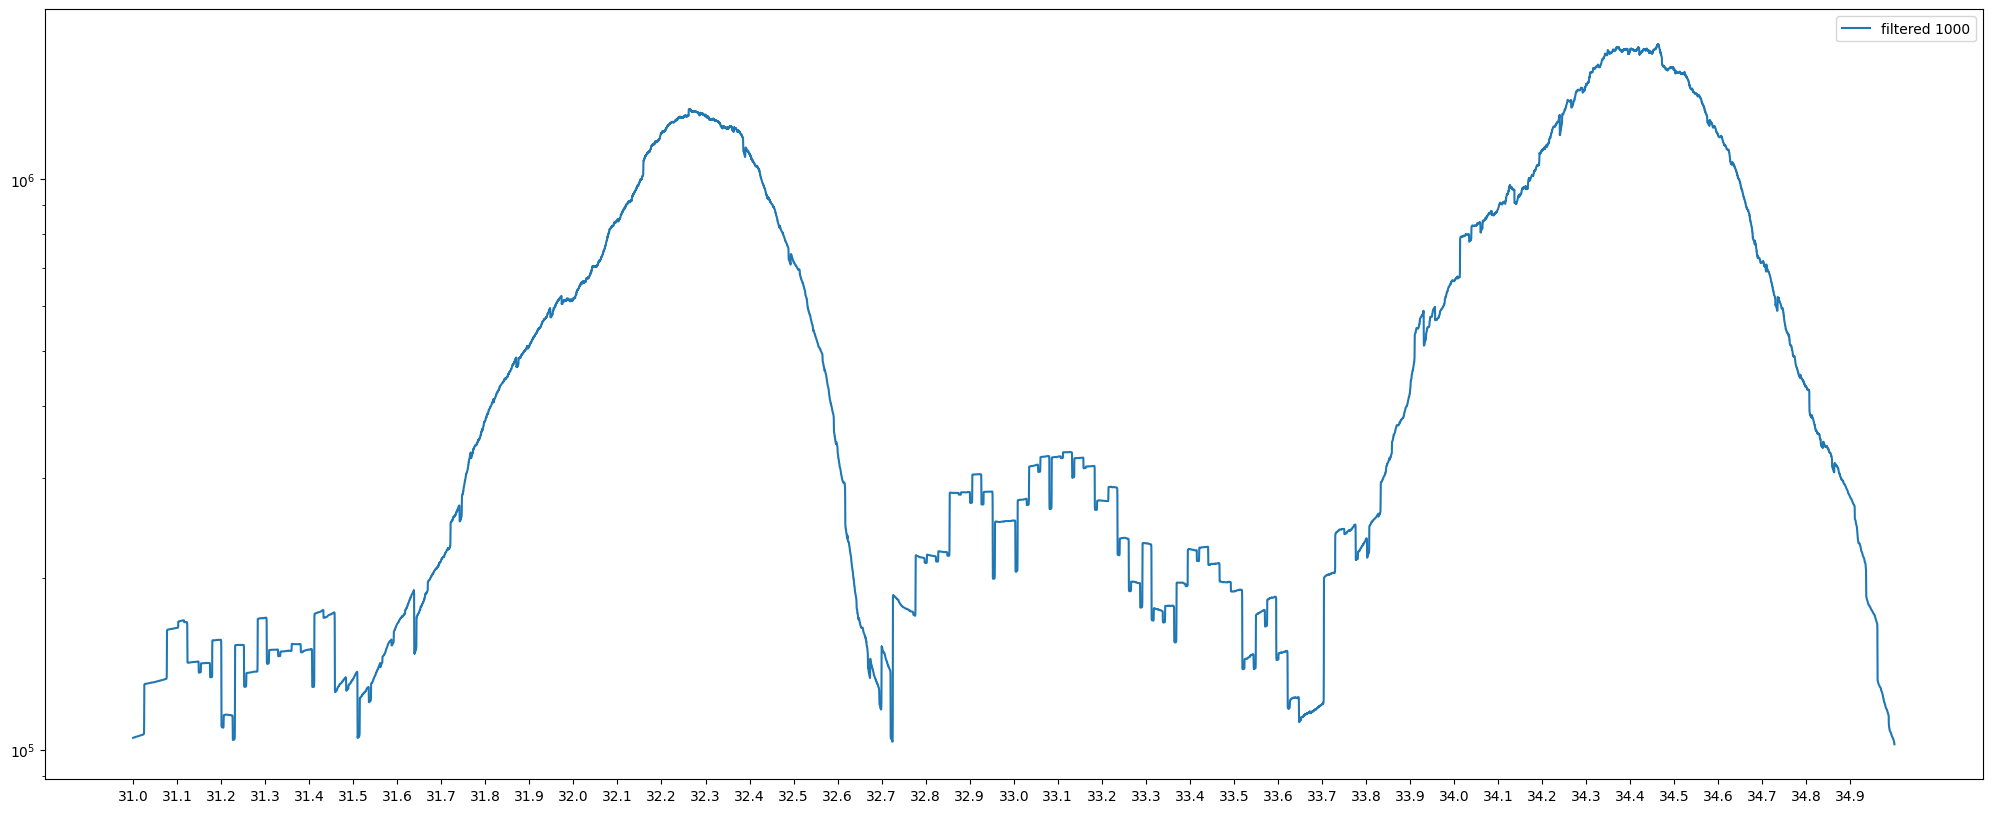

In [18]:
import collections
from copy import deepcopy

filtered = filter_highpass(F, data, 0.04)

mean10 = np.convolve(np.square(filtered), np.ones(10) / 10, 'same')
mean1000 = np.convolve(np.square(filtered), np.ones(10000) / 10000, 'same')
t = np.linspace(START, END, F*(END-START))

# def delete_peaks(mean):
#     THR = 10**5
#     ans = deepcopy(mean)
#     max_samples = 10000
#     cur_win = collections.deque(maxlen=max_samples)
#     for i in range(max_samples):
#         cur_win.append(0)
#     for i, w in enumerate(ans):
#         cur_win.append(w)
#         if w > sum(cur_win) / max_samples + THR:
#             ans[i] = sum(cur_win) / max_samples
#     return ans


fig, ax = plt.subplots(figsize=(25, 10))
# ax.plot(t, mean10, label='filtered 10')
ax.plot(t, mean1000, label='filtered 1000')
#ax.plot(t, delete_peaks(mean), label='filtered peaks')
ax.set_xticks(np.arange(START, END, step=0.1))
ax.set_yscale('log')
ax.legend()

Text(0.5, 1.0, 'FFT')

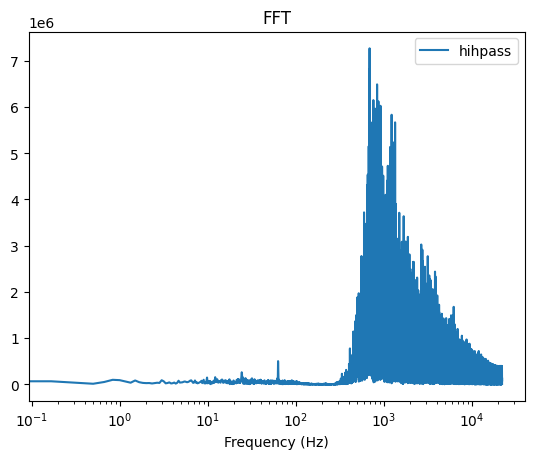

In [86]:

highpass = filter_highpass(F, data, 0.015)
#lowpass = filter_lowpass(F, data, 0.2)
wavio.write('data/highpass.wav', highpass, F, sampwidth=2)

#plt.semilogx(rfftfreq(len(data), 1.0/F), np.abs(rfft(data)), label='real')
plt.semilogx(rfftfreq(len(highpass), 1.0/F), np.abs(rfft(highpass)), label='hihpass')
#plt.semilogx(rfftfreq(len(lowpass), 1.0/F), np.abs(rfft(lowpass)), label='lowpass')
plt.xlabel("Frequency (Hz)")
plt.legend()
plt.title("FFT")

# plt.plot(data, label='real')
# plt.plot(filter_highpass(F, data, 0.1357/2), label='filter')
# plt.xlabel("Time")
# plt.legend()
# plt.title("Signal")

In [251]:
def filter_highpass(F, signal, filter_cutoff=0.02):
    b = scipy.signal.firwin(201, cutoff=F*filter_cutoff, fs=F, pass_zero='highpass')
    return scipy.signal.lfilter(b, [1.0], signal)
    # w, h = scipy.signal.freqz(b, fs=F)
    # plt.title('Digital filter frequency response')
    # plt.plot(w, 20*np.log10(np.abs(h)))
    # plt.title('Digital filter frequency response')
    # plt.ylabel('Amplitude Response [dB]')
    # plt.xlabel('Frequency, Hz')
    # plt.grid()
    # plt.show()

def filter_lowpass(F, signal, filter_cutoff=0.02):
    b = scipy.signal.firwin(201, cutoff=F*filter_cutoff, fs=F, pass_zero='lowpass')
    return scipy.signal.lfilter(b, [1.0], signal)
    w, h = scipy.signal.freqz(b, fs=F)
    plt.title('Digital filter frequency response')
    plt.plot(w, 20*np.log10(np.abs(h)))
    plt.title('Digital filter frequency response')
    plt.ylabel('Amplitude Response [dB]')
    plt.xlabel('Frequency, Hz')
    plt.grid()
    plt.show()

filter_lowpass(F, 0.5, 0.2)

ValueError: x must be at least 1-D

In [18]:
x = data
t = np.linspace(START, END, len(x))
widths = np.geomspace(2**0, 2**14, num=15*3)
coefficients, frequencies = pywt.cwt(x, widths, sampling_period=1.0/F, wavelet='cgau8')
for i in range(len(coefficients)):
    mean = np.mean(coefficients[i])
    std_dev = np.std(coefficients[i])
    coefficients[i] = (coefficients[i] - mean) / std_dev

fig, ax = plt.subplots(1, 1, figsize=(30, 6))

pcm = ax.pcolormesh(t, frequencies, np.abs(coefficients), vmin=-1, vmax=1,)
#ax.set_yscale("log")
ax.set_xlabel("Time, s")
ax.set_ylabel("Frequency, Hz")
# ax.set_title(title)
fig.colorbar(pcm, ax=ax)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

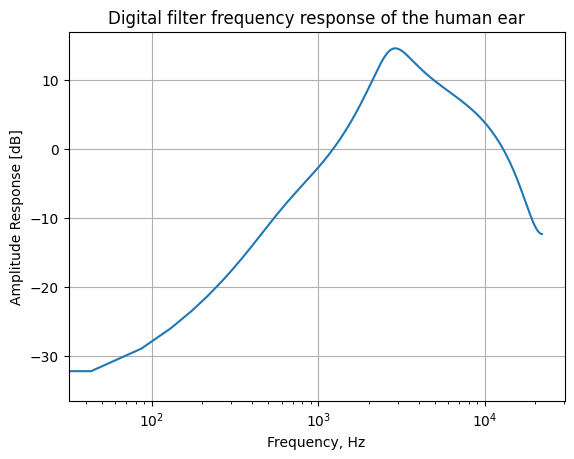

In [143]:
def filter(signal, F):
    b1 = [1, -0.824, -0.697, 0.340, 0.2025]
    a1 = [1, -1.674, 0.81]
    b2 = [1, -1.728, 0.595, 0.125, 0.009]
    a2 = [1, -1.876, 0.884]
    #ret = scipy.signal.lfilter(b1, a1, signal)
    #return scipy.signal.lfilter(b2, a2, ret)
    # f1 = scipy.signal.lti(b1, a1)
    # f1 = scipy.signal.lti(*scipy.signal.lp2hp(b1, a1))
    # w, mag_hp, p_hp = f1.bode()
    b1, a1 = scipy.signal.lp2hp(b1, a1)
    b2, a2 = scipy.signal.lp2hp(b2, a2)
    w1, h1 = scipy.signal.freqz(b1, a1, fs=F)
    w2, h2 = scipy.signal.freqz(b2, a2, fs=F)
    
    plt.plot(w1, 20*np.log10(np.abs(h1) * np.abs(h2)))
    plt.title('Digital filter frequency response of the human ear')
    plt.ylabel('Amplitude Response [dB]')
    plt.xlabel('Frequency, Hz')
    plt.xscale('log')
    plt.grid()
    plt.show()
filter(1, 44100)

1717956179.2189662


c:\dev\drons\.venv\Lib\site-packages\matplotlib\image.py:176: UserWarning: Data with more than 2**23 columns cannot be accurately displayed. Downsampling to less than 2**23 columns before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**23 columns'))


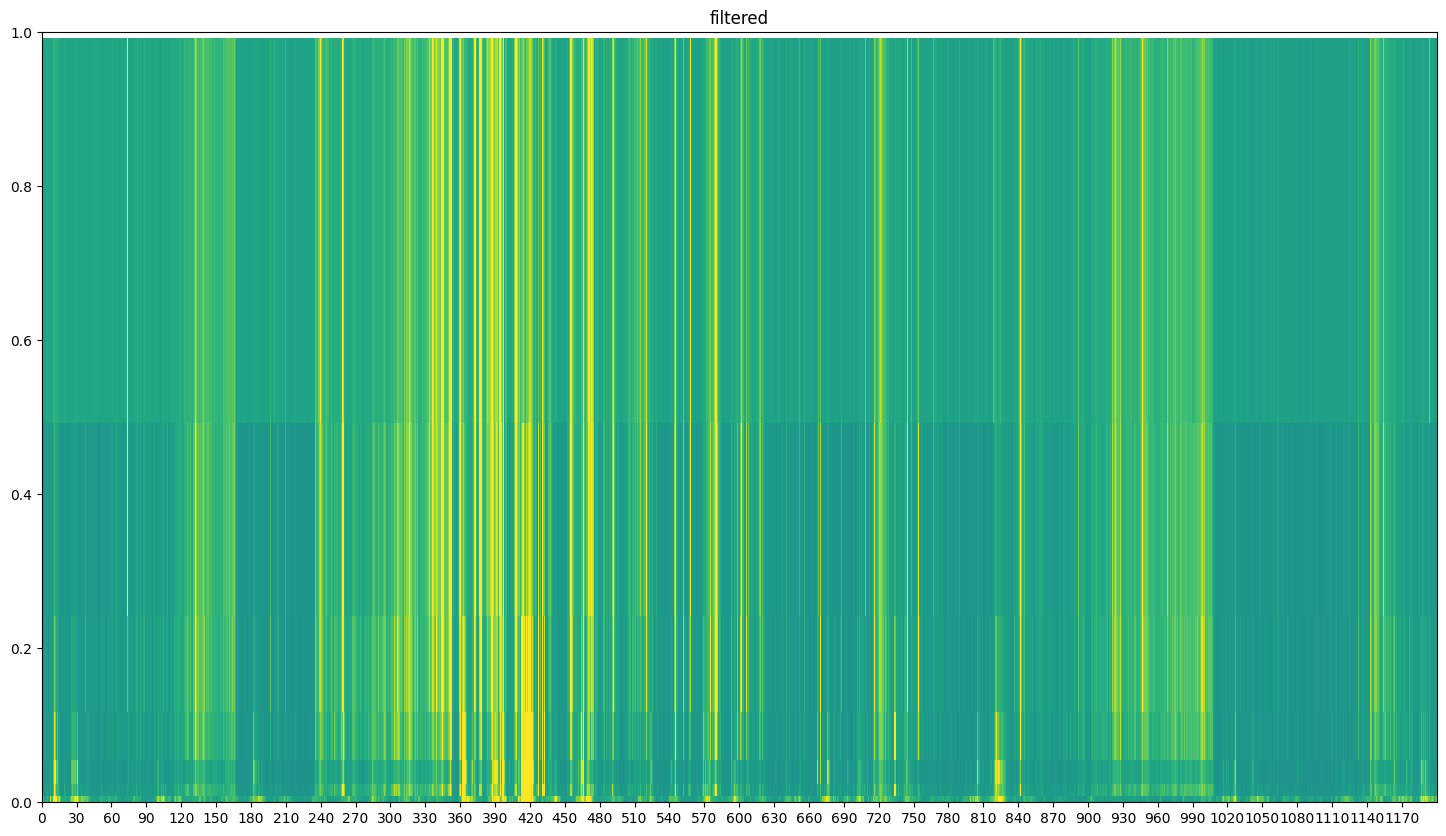

c:\dev\drons\.venv\Lib\site-packages\wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000305180437934, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


In [22]:
from utils import load_data, filter_highpass
import matplotlib.pyplot as plt
import pywt
import scipy.signal
import numpy as np
from numpy.fft import rfft, rfftfreq
import wavio
import time

F, raw_data = load_data("data/Out-58/07_06_2024_15_32_12/audio/LS_07-06-2024__16-17-32.wav")

OFFSET = 0
START = 0
END = 60 * 20
data = raw_data[int(F*(START + OFFSET)):int(F*(END + OFFSET))]
def scalogram(data, wavelet_nm):
    means = [-0.20903559490717494, 0.036762829207657007, 0.0924794152478447, -0.016174888335484514, -0.0014681012150147847, -0.025436077176437758, -0.003465459757298118]
    std_devs = [97.3446572978594, 71.32080537653721, 159.26835265993802, 287.9126339564795, 195.74196699292455, 83.31490079760044, 29.179565837473643]
    for i in range(len(data)):
        mean = means[i] # np.mean(data[i])
        std_dev = std_devs[i] # np.std(data[i])
        # print(f'{i = }, {mean = }, {std_dev = }')
        data[i] = (data[i] - mean) / std_dev

    print(time.time())

    # tmp_data = []
    # for d in data:
    #     tmp_data.extend(d)
    # tmp_data = np.array(tmp_data)
    # mean = np.mean(tmp_data)
    # std_dev = np.std(tmp_data)
    # tmp_data = (tmp_data - mean) / std_dev

    # print(mean)
    # print(std_dev)

    # for i in range(len(data)):
    #     data[i] = tmp_data[:len(data[i])]
    #     tmp_data = tmp_data[len(data[i]):]

    bottom = 0
    fig, ax = plt.subplots(figsize=(18, 10))
    for row in range(0, len(data)):
        scale = 2.0 ** (row - len(data))
        #cale = 1.0 / len(data)
        ax.imshow(
            np.array([abs(data[row])]), 
            vmin=-2, vmax=2,
            aspect='auto',
            extent = [START, END, bottom, bottom + scale]
        )
        ax.set_xticks(np.arange(START, END, step=30))
        #plt.yticks(np.arange(0, 1, step=0.2))
        ax.set_ylim([0, 1])
        #plt.xlim([START, END])
        bottom += scale
    plt.title(wavelet_nm)
    plt.show()
def filter_highpass(F, signal, filter_cutoff=0.02):
    b = scipy.signal.firwin(61, cutoff=F*filter_cutoff, fs=F, pass_zero='highpass')
    return scipy.signal.lfilter(b, [1.0], signal)
    w, h = scipy.signal.freqz(b, fs=F)
    plt.title('Digital filter frequency response')
    plt.plot(w, 20*np.log10(np.abs(h)))
    plt.title('Digital filter frequency response')
    plt.ylabel('Amplitude Response [dB]')
    plt.xlabel('Frequency, Hz')
    plt.grid()
    plt.show()
filtered = filter_highpass(F, data, 0.04)
#factor = (np.sum(data**2) / np.sum(filtered**2))**0.5
#filtered = (filtered*factor).astype(int)

# for i in range(1):
#     data = raw_data[int(F* (0 + (i)/2.0) ):int(F* (0 + (i+1)/2.0) )]
#     print(time.time())
#     filtered = filter_highpass(F, data, 0.04)
#     sig = pywt.wavedec(filtered, 'coif1', level=6)
#     scalogram(sig, f'filtered from {i/2.0} to {(i+1)/2.0}')

sig = pywt.wavedec(filtered, 'coif1', level=6)
scalogram(sig, f'filtered')
wavio.write("data/data.wav", data, F, sampwidth=2)
wavio.write("data/filtered.wav", filtered, F, sampwidth=2)